#**Titanic - Machine Learning from Disaster**

##**Description**

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

##**The Challenge**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


##**Overview**

The data has been split into two groups:

**training set (train.csv)**

**test set (test.csv)**

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

**Data Dictionary**

**Variable**  |	**Definition** |   	**Key**

survival	| Survival	 |   0 = No, 1 = Yes

pclass	  | Ticket class|	 1 = 1st, 2 = 2nd, 3 = 3rd

sex       |	   Sex

Age       |   Age in years

sibsp     |	# of siblings / spouses aboard the Titanic

parch	    |  # of parents / children aboard the Titanic

ticket    |	Ticket number

fare      |	Passenger fare

cabin     |	Cabin number

embarked  |	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

# **Installing require Tools**

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


#**Import the Libraries**

In [ ]:
## import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import gradio as gr

#**Data Collection and Preprocessing**

In [ ]:
# Loading the dataset into a pandas DataFrame
titanic_data = pd.read_csv('train.csv')  # Use this to identify issues

In [ ]:
# Display the first few rows
print("First 5 rows of the dataset:")
titanic_data.head()

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Display the last few rows
print("Last 5 rows of the dataset:")
titanic_data.tail()

Last 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Checking the shape of the dataset
titanic_data.shape    # Outputs the number of rows and columns in the dataset.

(891, 12)

In [ ]:
# Statistical description of the dataset
print("\nStatistical Description of the Dataset:")
titanic_data.describe()


Statistical Description of the Dataset:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Check for missing values
missing_values = titanic_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Generating some Information about the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Handling the Missing values**

In [ ]:
# Drop the "Cabin" column from the DataFrame
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [ ]:
# Finding the mean value of "Age" column
print(titanic_data['Age'].mean())

29.69911764705882


In [ ]:
# Finding the mean value of "Age" column
print(titanic_data['Age'].median())

28.0


In [ ]:
# Replacing the missing values in "Age" column with mean values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

<ipython-input-70-d522398e9fc6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)


In [ ]:
# Finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


In [ ]:
# Replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

<ipython-input-73-2957e6f8081c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [ ]:
# Check for missing values
missing_values = titanic_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# **Data Analysis and Data Visualization**

In [ ]:
# Statistical description of the dataset
print("\nStatistical Description of the Dataset:")
titanic_data.describe()


Statistical Description of the Dataset:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Finding the number of people that Survived and Not Survived
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


**0 ---> Not Survived**

**1 ---> Survived**

In [ ]:
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [ ]:
# Checking the distribution of Survived column
print("\nDistribution of Survived Data:")
titanic_data['Survived'].value_counts()


Distribution of Survived Data:


,count
Survived,
0,549
1,342


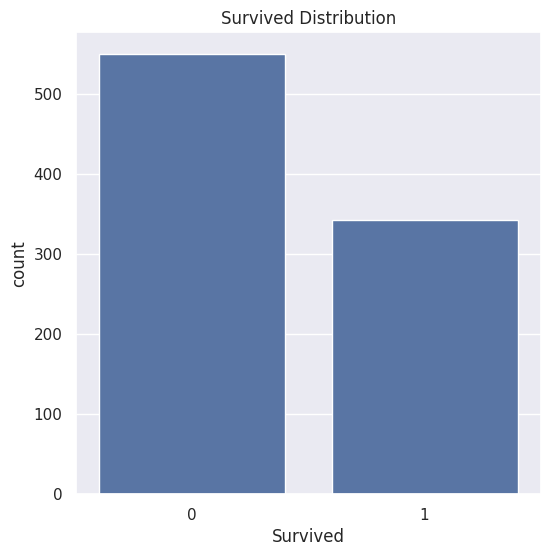

In [ ]:
# Distribution Vertical Count Plot graph of Survived Column
plt.figure(figsize=(6,6))
sns.countplot(x='Survived', data=titanic_data)
plt.title("Survived Distribution")
plt.show()

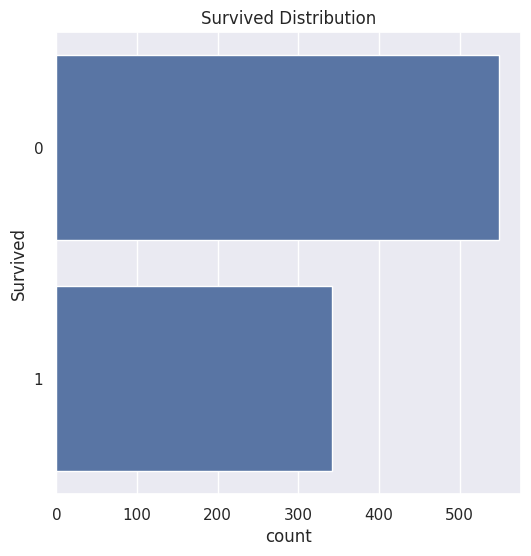

In [ ]:
# Distribution Horizontal Count Plot graph of Survived Column
plt.figure(figsize=(6,6))
sns.countplot(y='Survived', data=titanic_data)
plt.title("Survived Distribution")
plt.show()

In [ ]:
# Checking the distribution of Sex column
print("\nDistribution of Sex Data:")
titanic_data['Sex'].value_counts()


Distribution of Sex Data:


,count
Sex,
male,577
female,314


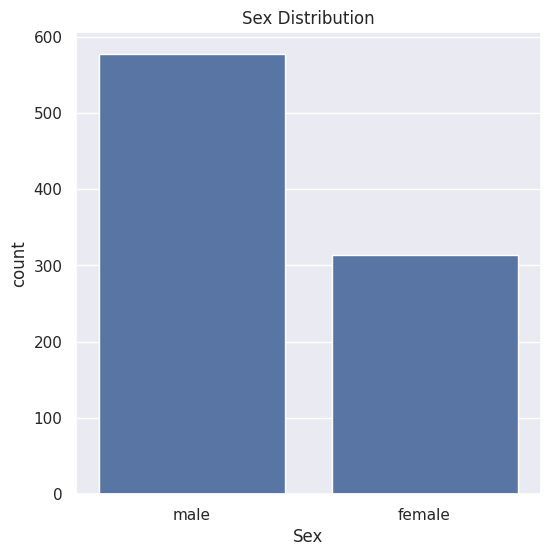

In [ ]:
# Distribution Vertical Count Plot graph of Sex Column
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', data=titanic_data)
plt.title("Sex Distribution")
plt.show()

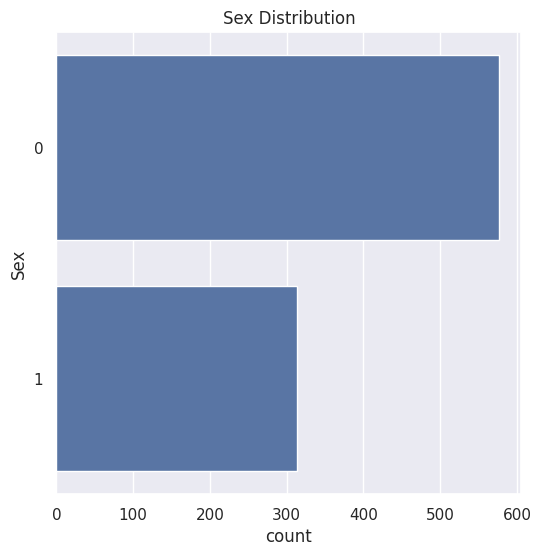

In [ ]:
# Distribution Horizontal Count Plot graph of Sex Column
plt.figure(figsize=(6,6))
sns.countplot(y='Sex', data=titanic_data)
plt.title("Sex Distribution")
plt.show()

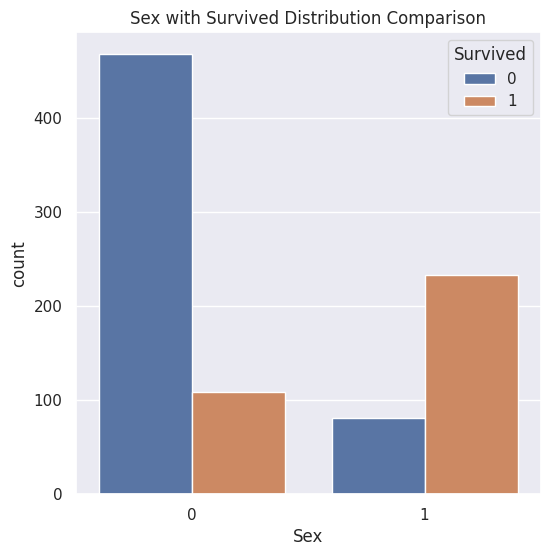

In [ ]:
# Distribution Count Plot graph of Survivors based on Gender wise
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title("Sex with Survived Distribution Comparison")
plt.show()

In [ ]:
# Checking the distribution of Pclass column
print("\nDistribution of Pclass Data:")
titanic_data['Pclass'].value_counts()


Distribution of Pclass Data:


,count
Pclass,
3,491
1,216
2,184


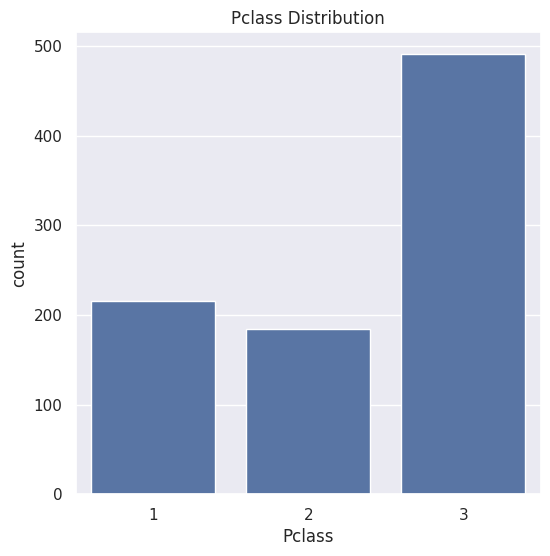

In [ ]:
# Distribution Vertical Count Plot graph of Pclass Column
plt.figure(figsize=(6,6))
sns.countplot(x='Pclass', data=titanic_data)
plt.title("Pclass Distribution")
plt.show()

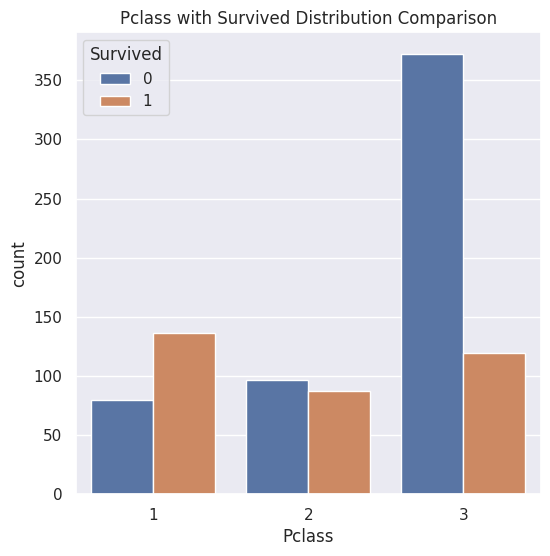

In [ ]:
# Distribution Vertical Count Plot graph of Embarked Column
plt.figure(figsize=(6,6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title("Pclass with Survived Distribution Comparison")
plt.show()

In [ ]:
# Finding the number of SibSp people
titanic_data['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


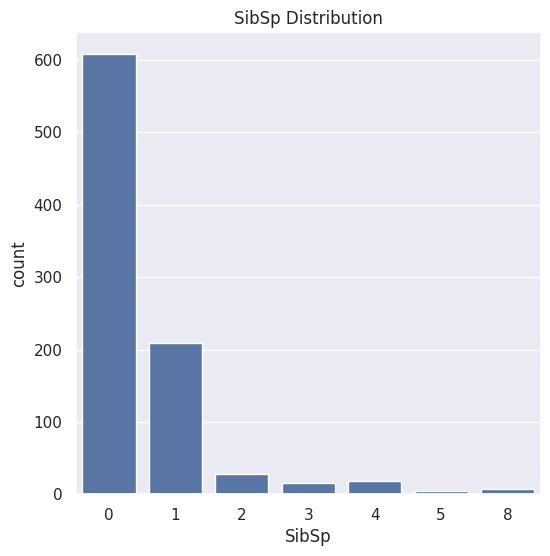

In [ ]:
# Distribution Vertical Count Plot graph of SibSp Column
plt.figure(figsize=(6,6))
sns.countplot(x='SibSp', data=titanic_data)
plt.title("SibSp Distribution")
plt.show()

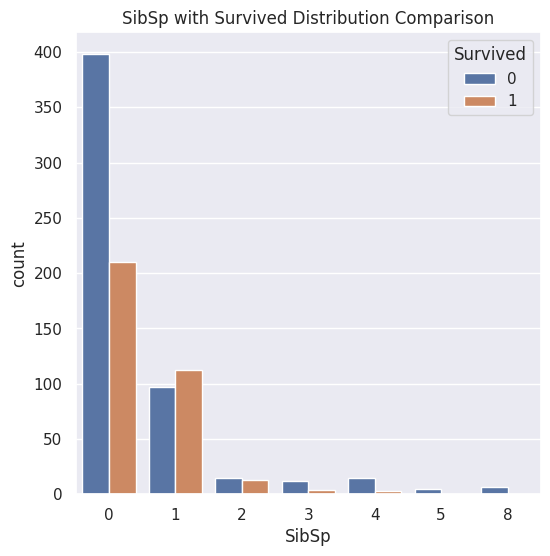

In [ ]:
# Distribution Vertical Count Plot graph of SibSp Column
plt.figure(figsize=(6,6))
sns.countplot(x='SibSp', hue='Survived', data=titanic_data)
plt.title("SibSp with Survived Distribution Comparison")
plt.show()

In [ ]:
# Checking the distribution of Parch column
print("\nDistribution of Parch Data:")
titanic_data['Parch'].value_counts()


Distribution of Parch Data:


,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


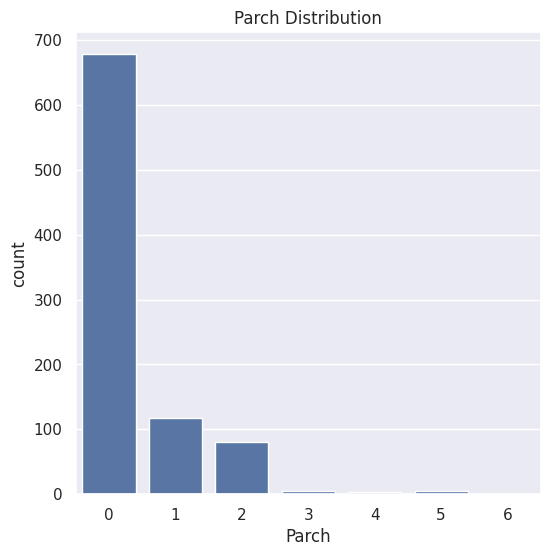

In [ ]:
# Distribution Vertical Count Plot graph of Parch Column
plt.figure(figsize=(6,6))
sns.countplot(x='Parch', data=titanic_data)
plt.title("Parch Distribution")
plt.show()

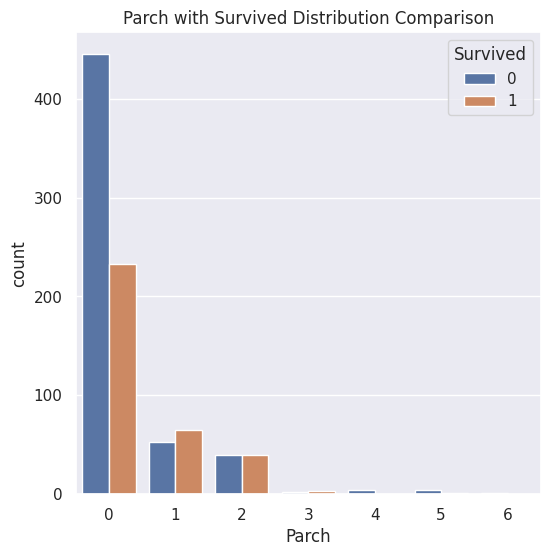

In [ ]:
# Distribution Vertical Count Plot graph of Parch Column
plt.figure(figsize=(6,6))
sns.countplot(x='Parch', hue='Survived', data=titanic_data)
plt.title("Parch with Survived Distribution Comparison")
plt.show()

In [ ]:
# Checking the distribution of Embarked column
print("\nDistribution of Embarked Data:")
titanic_data['Embarked'].value_counts()


Distribution of Embarked Data:


,count
Embarked,
0,646
1,168
2,77


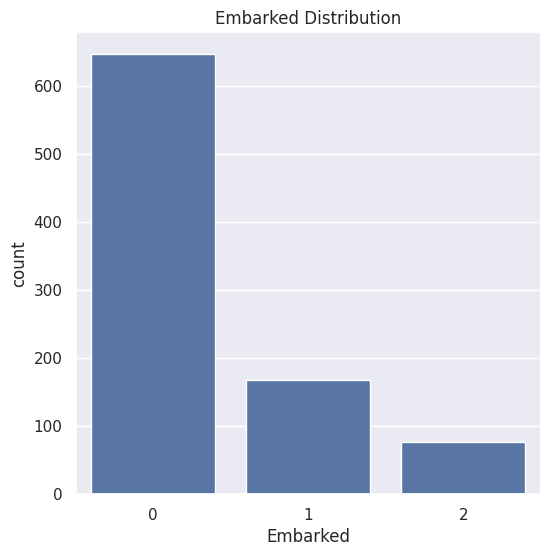

In [ ]:
# Distribution Vertical Count Plot graph of Embarked Column
plt.figure(figsize=(6,6))
sns.countplot(x='Embarked', data=titanic_data)
plt.title("Embarked Distribution")
plt.show()

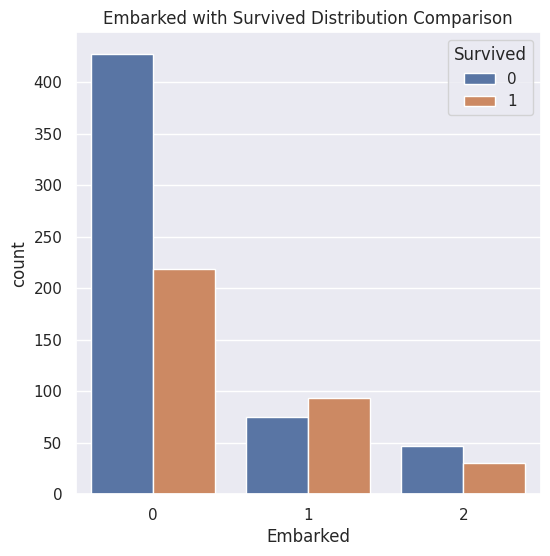

In [ ]:
# Distribution Vertical Count Plot graph of Embarked Column
plt.figure(figsize=(6,6))
sns.countplot(x='Embarked', hue='Survived', data=titanic_data)
plt.title("Embarked with Survived Distribution Comparison")
plt.show()

<ipython-input-127-d66bec7e868a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data["Age"])


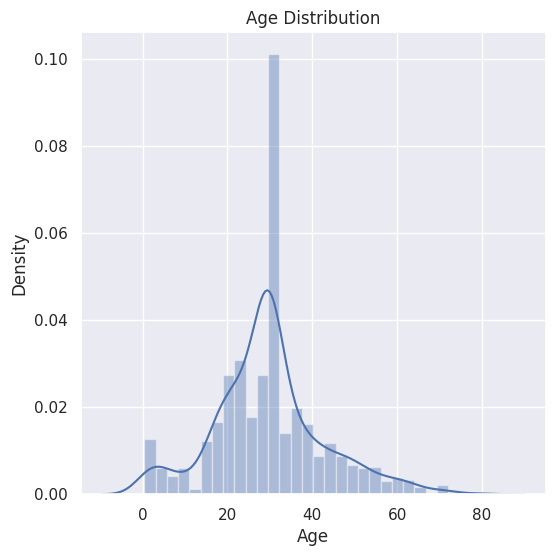

In [ ]:
# Distribution graph of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(titanic_data["Age"])
plt.title("Age Distribution")
plt.show()

<ipython-input-155-9cb3126eb08e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data["Fare"])


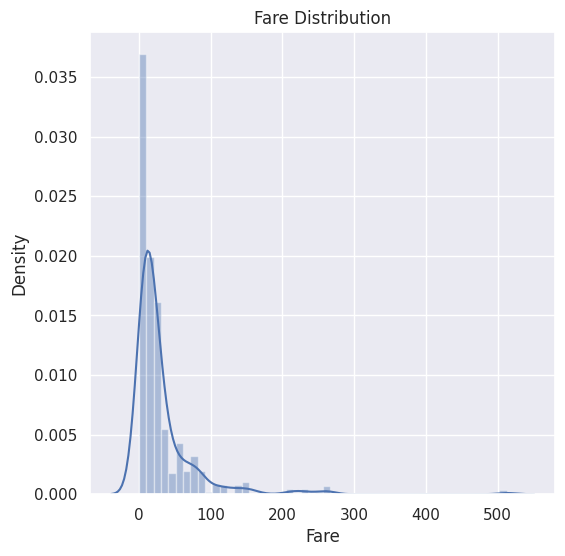

In [ ]:
# Distribution graph of Fare value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(titanic_data["Fare"])
plt.title("Fare Distribution")
plt.show()

In [ ]:
# Select only numeric columns
numeric_data = titanic_data.select_dtypes(include=['number'])

In [ ]:
# Compute the correlation matrix
corr = numeric_data.corr()

# Print the correlation matrix
print(corr)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.033207 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.069809 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.331339  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.084153  0.114631   
Age             0.033207 -0.069809 -0.331339 -0.084153  1.000000 -0.232625   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.232625  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.179191  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.091566  0.159651   
Embarked       -0.030467  0.106811  0.045702  0.116569  0.007461 -0.059961   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658 -0.030467  
Survived     0.081629  0.257307  0.106811  
Pclass       0.018443 -0.549500  0.045702  
Sex          0.245489  0.182333  0.116569  

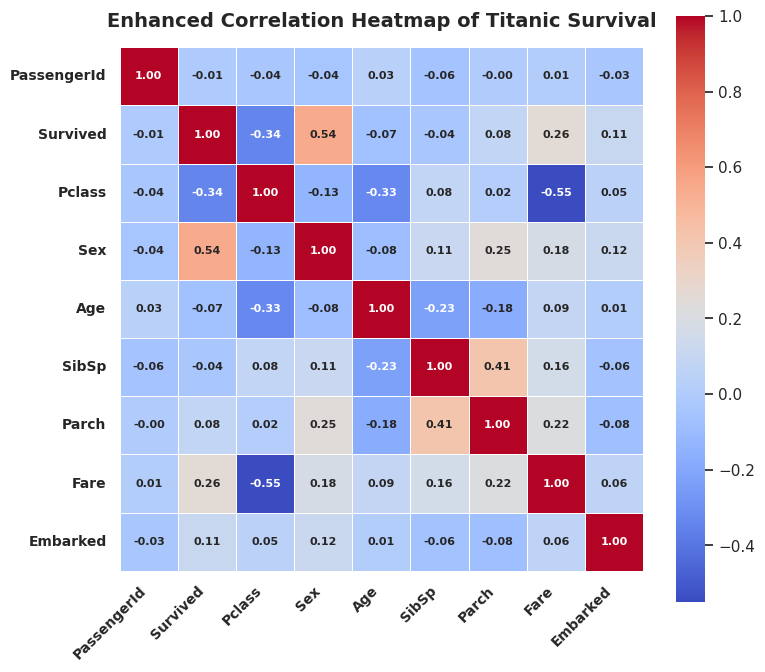

In [ ]:
# Create the heatmap with enhancements
plt.figure(figsize=(8, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 8, "weight": "bold"},
)
plt.title("Enhanced Correlation Heatmap of Titanic Survival", fontsize=14, fontweight="bold", pad=15)
plt.xticks(fontsize=10, rotation=45, ha="right", weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.tight_layout()

#**Data Preprocessing**

**Encoding the Categorical column**

In [ ]:
# Finding the number of the Sex people
titanic_data['Sex'].value_counts()

,count
Sex,
0,577
1,314


In [ ]:
# Finding the number of Embarked people
titanic_data['Embarked'].value_counts()

,count
Embarked,
0,646
1,168
2,77


In [ ]:
# Encoding the categorical column
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
# Display the first few rows
print("First 5 rows of the dataset:")
titanic_data.head()

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


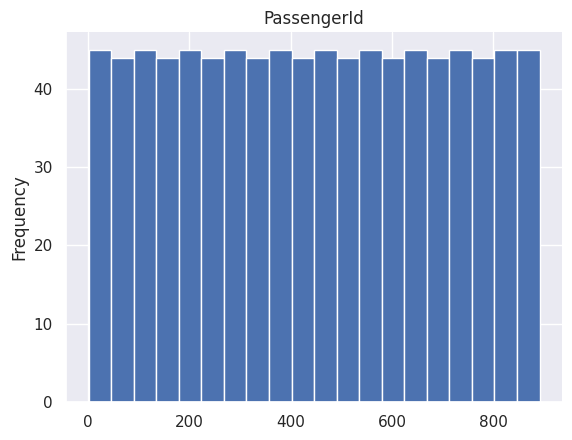

In [ ]:
# @title PassengerId

from matplotlib import pyplot as plt
titanic_data['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Splitting the dataset into Features & Target**

In [ ]:
# Splitting the dataset into Dependents & Independent
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = titanic_data['Survived']

In [ ]:
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0

Target (y):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


# **Splitting the dataset into Training and Test sets**

In [ ]:
# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y,  random_state=3)
print("\nDataset split completed:")
print(f"Total samples: {X.shape[0]}, Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Dataset split completed:
Total samples: 891, Training samples: 801, Test samples: 90


In [ ]:
# checking the number of Test and Train dataset
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (801, 7) (90, 7)


# **Model Training**

In [ ]:
# Initialize the model
logReg_model = LogisticRegression()

In [ ]:
# Training the LogisticRegression model with train data
logReg_model.fit(X_train, y_train)

LogisticRegression()

#**Model Evaluation**

In [ ]:
# Calculate accuracy on the training data
X_train_pred = logReg_model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_pred, y_train)
print('Accuracy on training data : ', train_data_accuracy)

Accuracy on training data :  0.7940074906367042


In [ ]:
# Generate and display the confusion matrix on the training data
# The confusion matrix shows the counts of True Positives, True Negatives, False Positives, and False Negatives
conf_matrix = confusion_matrix(y_train, X_train_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[421  73]
 [ 92 215]]


In [ ]:
# Generate and display the classification report
# The classification report includes precision, recall, F1-score, and support for each class
class_report = classification_report(y_train, X_train_pred, target_names=["Not Survived (0)", "Survived (1)"])
print("\nClassification Report:")
print(class_report)


Classification Report:
                  precision    recall  f1-score   support

Not Survived (0)       0.82      0.85      0.84       494
    Survived (1)       0.75      0.70      0.72       307

        accuracy                           0.79       801
       macro avg       0.78      0.78      0.78       801
    weighted avg       0.79      0.79      0.79       801



In [ ]:
# accuracy on the test data
X_test_pred = logReg_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8555555555555555


In [ ]:
# Generate and display the confusion matrix on the test data
# The confusion matrix shows the counts of True Positives, True Negatives, False Positives, and False Negatives
conf_matrix = confusion_matrix(y_test, X_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[48  7]
 [ 6 29]]


In [ ]:
# Generate and display the classification report
# The classification report includes precision, recall, F1-score, and support for each class
class_report = classification_report(y_test, X_test_pred, target_names=["Not Survived (0)", "Survived (1)"])
print("\nClassification Report:")
print(class_report)

# **Making a Predictive System**

In [ ]:
# Sample input data (new instance to classify)
input_data = [3, 0, 22, 1, 0, 7.25, 0]

# Converting input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the input array for prediction (to match model's expected input shape)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Making a prediction
prediction = logReg_model.predict(input_data_reshaped)
print(prediction)

# Outputting the result
if prediction[0] == 0:
    print("The Person Survived in Titanic Sinking Accident  (i.e. Survived)")
else:
    print("The Person does not Survived in Titanic Sinking  (i.e. Not Survived)")

[0]
The Person Survived in Titanic Sinking Accident  (i.e. Survived)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Sample input data (new instance to classify)
input_data = [1, 1, 38, 1, 0, 71.2833, 1]

# Converting input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the input array for prediction (to match model's expected input shape)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Making a prediction
prediction = logReg_model.predict(input_data_reshaped)
print(prediction)

# Outputting the result
if prediction[0] == 0:
    print("The Person Survived in Titanic Sinking Accident  (i.e. Survived)")
else:
    print("The Person does not Survived in Titanic Sinking  (i.e. Not Survived)")

[1]
The Person does not Survived in Titanic Sinking  (i.e. Not Survived)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
def predict_titanic_survival(input_data):
    """
    Predicts titanic survival based on input data using the trained using Logistic Regression model.

    Parameters:
        input_data (list): A list of values corresponding to the features in the order:
                           [Pclass, Sex, Age, SibSp ,Parch, Fare, Cabin]

    Returns:
        str: Prediction result (Survived or Not Survived).
    """
    # Convert input_data to a NumPy array
    input_array = np.array(input_data).reshape(1, -1)

    # Ensure the model and scaler (if used) are applied to the input
    prediction = logReg_model.predict(input_array)

    # Interpret and return the result
    if prediction[0] == 0:
        return "The Person Survived in Titanic Sinking Accident (i.e. Survived)"
    else:
        return "The Person does not Survived in Titanic Sinking  (i.e. Not Survived)"


In [ ]:
# Example: Predict for a Titanic Survival or Not Survival
# Sample data: [Pclass, Sex, Age, SibSp ,Parch, Fare, Embarked]
sample_data = [3, 0, 0, 0, 330877, 8.4583, 2]


# Call the function to predict
result = predict_titanic_survival(sample_data)
print("Prediction Result:", result)

Prediction Result: The Person Survived in Titanic Sinking Accident (i.e. Survived)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
def gradio_predict(Pclass, Sex, Age, SibSp ,Parch, Fare, Embarked):
    # Convert inputs to a list
    input_data = [
        int(Pclass), int(Sex), float(Age), int(SibSp),
        int(Parch), float(Fare), int(Embarked)
        ]

    # Call the prediction function (you need to define predict_titanic_survival)
    prediction = predict_titanic_survival(input_data)  # Ensure predict_titanic_survival is defined
    return prediction

# Set up the Gradio interface
interface = gr.Interface(
    fn=gradio_predict,
    inputs=[
        gr.Dropdown(["1", "2", "3"],label="Pclass"),
        gr.Dropdown(["0", "1"], label="Sex"),
        gr.Number(label="Age"),
        gr.Dropdown(["0", "1", "2", "3", "4", "5", "8"],label="SibSp"),
        gr.Dropdown(["0", "1", "2", "3", "4", "5", "6"],label="Parch"),
        gr.Number(label="Fare"),
        gr.Dropdown(["0", "1", "2"],label="Embarked"),

    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="Titanic Survival Prediction",
    description="Enter the required details to predict if a Passenger Survived or Not."
)

# Launch the interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d8f2d125aedcae1291.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
